## 한국거래소(KRX) 전체 종목 분석
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

    
* Pandas를 통한 파일 저장과 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

## 데이터셋 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

* FinanceDataReader 로 수집한 전체 종목 불러오기
    * 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리
    * [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
    * [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
    * https://pandas-datareader.readthedocs.io/en/latest/readers/index.html


In [2]:
# !pip install finance-datareader

In [3]:
# 한국거래소 전체 종목 데이터 URL
url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
print(url)

http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13


In [4]:
tables = pd.read_html(url)
tables[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DL,210,기타 금융업,지주회사,1976-02-02,12월,전병욱,http://www.dlholdings.co.kr,서울특별시
1,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,KG케미칼,1390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,"곽정현, 김재익",http://www.kgchem.co.kr,울산광역시
...,...,...,...,...,...,...,...,...,...
2505,코스텍시스템,169670,특수 목적용 기계 제조업,"반도체 웨이퍼 이송장비, 본딩장비",2022-01-21,12월,배준호,http://www.kosteks.com/,경기도
2506,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도
2507,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
2508,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [5]:
import FinanceDataReader as fdr

# 주피터 노트북에서만 가능한 도움말 기능 단축키 => shift+tab
df = fdr.StockListing("KRX")
df.shape

(7561, 10)

In [6]:
# ? 도움말
# ?? 소스코드
# fdr.StockListing??

### 일부 데이터만 가져오기

{'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
                            '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
                            '홈페이지':'HomePage', '지역':'Region', }

In [7]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [8]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7558,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7559,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7560,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [9]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다. 
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4951,056090,KOSDAQ,에디슨INNO,의료용 기기 제조업,정형외과용 신체보정용 의료기기,2015-11-12,12월,최도영,http://www.youic.com,경기도
3309,52HJ08,KOSPI,미래HJ08KOSPI200콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4996,237690,KOSDAQ,에스티팜,의약품 제조업,원료의약품,2016-06-23,12월,김경진,http://www.stpharm.co.kr,경기도
1656,55G884,KOSPI,NHG884현대차콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6986,57HG18,KOSPI,한국HG18KOSPI200콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5570,007370,KOSDAQ,진양제약,의약품 제조업,"소부날, 옥티란",2000-07-27,12월,최재준,http://www.jinyangpharm.co.kr,서울특별시
3003,52HE02,KOSPI,미래HE02아모레콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
749,58HA52,KOSPI,KBHA52네이버콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3950,520030,KOSPI,미래에셋 KRX금현물 Auto-KO-C 2312-01 ETN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
891,58HB94,KOSPI,KBHB94LG이노텍콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [10]:
# 결측치가 아닌 값에 대해 True, False 값
df["Sector"].notnull()

0        True
1        True
2        True
3        True
4        True
        ...  
7556    False
7557    False
7558    False
7559    False
7560     True
Name: Sector, Length: 7561, dtype: bool

In [11]:
# boolean Indexing
# Sector(업종)이 결측치가 아닌 데이터만 가져오기
df[df["Sector"].notnull()]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7549,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7550,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시
7553,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7554,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [12]:
# Sector(업종)이 결측치라면 아마도 금융상품 일 것입니다.
df_sector_null = df[df["Sector"].isnull()]
df_sector_null

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN
10,395750,KOSPI,ARIRANG ESG가치주액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7555,435530,KOSPI,히어로즈 TDF2030액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7556,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7557,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7558,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [13]:
(True + True + False) / 3

0.6666666666666666

In [14]:
df_sector_null.isnull()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6,False,False,False,True,True,True,True,True,True,True
7,False,False,False,True,True,True,True,True,True,True
8,False,False,False,True,True,True,True,True,True,True
9,False,False,False,True,True,True,True,True,True,True
10,False,False,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
7555,False,False,False,True,True,True,True,True,True,True
7556,False,False,False,True,True,True,True,True,True,True
7557,False,False,False,True,True,True,True,True,True,True
7558,False,False,False,True,True,True,True,True,True,True


In [15]:
df_sector_null.isnull().mean() * 100

Symbol              0.0
Market              0.0
Name                0.0
Sector            100.0
Industry          100.0
ListingDate       100.0
SettleMonth       100.0
Representative    100.0
HomePage          100.0
Region            100.0
dtype: float64

In [16]:
# 결측치인 컬럼을 삭제
# axis 0==> 행 1==> 열
# 컬럼이 결측치 인것을 삭제합니다.
df_sector_null.dropna(axis=1)

,Symbol,Market,Name
6,152100,KOSPI,ARIRANG 200
7,295820,KOSPI,ARIRANG 200동일가중
8,253150,KOSPI,ARIRANG 200선물레버리지
9,253160,KOSPI,ARIRANG 200선물인버스2X
10,395750,KOSPI,ARIRANG ESG가치주액티브
...,...,...,...
7555,435530,KOSPI,히어로즈 TDF2030액티브
7556,435540,KOSPI,히어로즈 TDF2040액티브
7557,435550,KOSPI,히어로즈 TDF2050액티브
7558,419890,KOSPI,히어로즈 단기채권ESG액티브


In [17]:
# np.nan 은 결측치를 의미합니다.
# not a number 의 약자입니다.
# nat == not a timestamp 시간에 대한 결측치를 의미합니다.

## 데이터 요약하기

In [18]:
# info 로 요약 데이터를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7561 entries, 0 to 7560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7561 non-null   object        
 1   Market          7561 non-null   object        
 2   Name            7561 non-null   object        
 3   Sector          2510 non-null   object        
 4   Industry        2494 non-null   object        
 5   ListingDate     2510 non-null   datetime64[ns]
 6   SettleMonth     2510 non-null   object        
 7   Representative  2510 non-null   object        
 8   HomePage        2353 non-null   object        
 9   Region          2509 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 649.8+ KB


In [19]:
# describe 로 기술통계값을 봅니다.
df.describe()

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,7561,7561,7561,2510,2494,2510,2510,2510,2353,2509
unique,7561,3,7561,161,2334,1867,8,2390,2332,22
top,060310,KOSPI,3S,소프트웨어 개발 및 공급업,기업인수합병,1996-07-03 00:00:00,12월,-,http://www.donga.co.kr,서울특별시
freq,1,5854,1,152,30,8,2450,5,2,1020
first,NaN,NaN,NaN,NaN,NaN,1956-03-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-07-15 00:00:00,NaN,NaN,NaN,NaN


In [20]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

Symbol            7561
Market               3
Name              7561
Sector             161
Industry          2334
ListingDate       1867
SettleMonth          8
Representative    2390
HomePage          2332
Region              22
dtype: int64

In [21]:
df.dtypes

Symbol                    object
Market                    object
Name                      object
Sector                    object
Industry                  object
ListingDate       datetime64[ns]
SettleMonth               object
Representative            object
HomePage                  object
Region                    object
dtype: object

In [22]:
# index 값 보기
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7551, 7552, 7553, 7554, 7555, 7556, 7557, 7558, 7559, 7560],
           dtype='int64', length=7561)

In [23]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [24]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '김세완', 'http://www.3sref.com',
        '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현, 손삼달',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['419890', 'KOSPI', '히어로즈 단기채권ESG액티브', ..., nan, nan, nan],
       ['429870', 'KOSPI', '히어로즈 리츠이지스액티브', ..., nan, nan, nan],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
# Name 컬럼 하나만 가져옵니다.
df["Name"]

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
             ...       
7556    히어로즈 TDF2040액티브
7557    히어로즈 TDF2050액티브
7558    히어로즈 단기채권ESG액티브
7559      히어로즈 리츠이지스액티브
7560                 힘스
Name: Name, Length: 7561, dtype: object

In [27]:
type(1)

int

In [28]:
type("1")

str

In [29]:
type(1.0)

float

In [30]:
# df["Name"] 의 type을 봅니다.
type(df["Name"])

pandas.core.series.Series

In [31]:
df["Name"].dtypes

dtype('O')

In [32]:
# 0번째 행만 가져옵니다. 행인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate        2002-04-23 00:00:00
SettleMonth                        03월
Representative                     김세완
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [33]:
# df.loc[0] 의 type을 봅니다.
type(df.loc[0])

pandas.core.series.Series

In [34]:
pd.Series([1, 3, 5])

0    1
1    3
2    5
dtype: int64

In [35]:
pd.Series([1, 3, 5, 7.0])

0    1.0
1    3.0
2    5.0
3    7.0
dtype: float64

In [36]:
pd.Series([1, 3, 5, 7.0, "문자"])

0      1
1      3
2      5
3    7.0
4     문자
dtype: object

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [37]:
# df 변수의 타입을 봅니다.
type(df)

pandas.core.frame.DataFrame

In [38]:
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [39]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다. 
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요. 
df[["Name", "Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520
...,...,...
7556,히어로즈 TDF2040액티브,435540
7557,히어로즈 TDF2050액티브,435550
7558,히어로즈 단기채권ESG액티브,419890
7559,히어로즈 리츠이지스액티브,429870


In [40]:
# 하나의 컬럼을 가져올 때도 컬럼에 []를 한번 더 감싸주면 데이터프레임 형태로 불러옵니다.
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
7556,히어로즈 TDF2040액티브
7557,히어로즈 TDF2050액티브
7558,히어로즈 단기채권ESG액티브
7559,히어로즈 리츠이지스액티브


In [41]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
df.loc[[0, 1, 2]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [42]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df["Name"]

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
             ...       
7556    히어로즈 TDF2040액티브
7557    히어로즈 TDF2050액티브
7558    히어로즈 단기채권ESG액티브
7559      히어로즈 리츠이지스액티브
7560                 힘스
Name: Name, Length: 7561, dtype: object

In [43]:
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
7556,히어로즈 TDF2040액티브
7557,히어로즈 TDF2050액티브
7558,히어로즈 단기채권ESG액티브
7559,히어로즈 리츠이지스액티브


### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [44]:
# 행과 열 함께 가져오기
# .loc[행, 열]
df.loc[0, "Name"]

'3S'

In [45]:
# .loc[행, 열]
df.loc[[0, 1], ["Name", "Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570


In [46]:
# %timeit

%timeit df.loc[0, "Name"]

6.43 µs ± 603 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [47]:
# %timeit
%timeit df.loc[0]["Name"]

113 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [48]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0, 1, 2], "Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [49]:
# 여러개의 행과 여러 개의 컬럼 가져오기
# .loc[행, 열]

df.loc[[0, 1, 2], ["Name", "Symbol", "Region"]]

,Name,Symbol,Region
0,3S,060310,서울특별시
1,AJ네트웍스,095570,서울특별시
2,AK홀딩스,006840,서울특별시


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [50]:
# 카카오를 찾습니다.
df[df["Name"] == "카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5600,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"남궁훈, 홍은택 각자 대표이사",http://www.kakaocorp.com,제주특별자치도


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [51]:
# and => &
# or => |
True and False

False

In [52]:
True & True

True

In [53]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
print("Market:", df["Market"].unique())

df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), 
       ["Symbol", "Name"]].head()

Market: ['KOSDAQ' 'KOSPI' 'KONEX']


,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
59,027410,BGF
60,282330,BGF리테일
63,001460,BYC


In [54]:
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [55]:
df.loc[df["Region"].isin(["서울특별시", "부산광역시", "인천광역시"]), ["Name", "Region"]].head()

,Name,Region
0,3S,서울특별시
1,AJ네트웍스,서울특별시
2,AK홀딩스,서울특별시
5,AP위성,서울특별시
59,BGF,서울특별시


In [56]:
df[df["Region"].notnull() & df["Region"].str.contains("서울|부산|인천|제주")].head(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시


In [57]:
df.loc[df["Region"].notnull() & df["Region"].str.contains("서울|부산|인천|제주"), "Region"]

0       서울특별시
1       서울특별시
2       서울특별시
5       서울특별시
59      서울특별시
        ...  
7549    서울특별시
7550    서울특별시
7553    서울특별시
7554    서울특별시
7560    인천광역시
Name: Region, Length: 1193, dtype: object

## 파생변수 만들기

In [58]:
df["ListingDate"] = pd.to_datetime(df["ListingDate"])

In [59]:
# ListingYear 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year
df[["Name", "ListingDate", "ListingYear"]].head()

,Name,ListingDate,ListingYear
0,3S,2002-04-23,2002.0
1,AJ네트웍스,2015-08-21,2015.0
2,AK홀딩스,1999-08-11,1999.0
3,APS홀딩스,2001-12-04,2001.0
4,AP시스템,2017-04-07,2017.0


In [60]:
# nan은 not a number의 약자로 결측치를 의미합니다.
type(np.nan)

float

In [61]:
pd.Series([2002, 2020])

0    2002
1    2020
dtype: int64

In [62]:
pd.Series([2002, 2020, np.nan])

0    2002.0
1    2020.0
2       NaN
dtype: float64

## 데이터 시각화 툴 소개

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 데이터 시각화를 위한 폰트설정

In [63]:
# 설치가 되어있지 않다면 주석을 해제하고 설치합니다.
# !pip install koreanize-matplotlib

In [64]:
import koreanize_matplotlib

### 폰트 설정 확인하기

<AxesSubplot:title={'center':'한글'}>

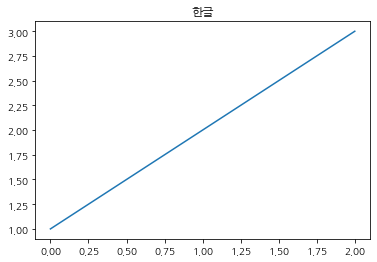

In [65]:
# 한글폰트 확인하기
pd.Series([1, 2, 3]).plot(title="한글")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [66]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [67]:
# value_counts()로 빈도수를 구합니다.
df["Market"].value_counts()

KOSPI     5854
KOSDAQ    1584
KONEX      123
Name: Market, dtype: int64

<AxesSubplot:>

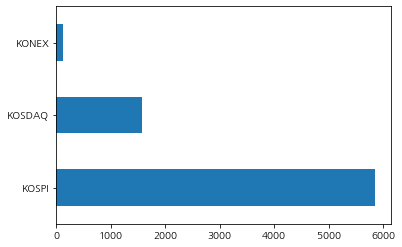

In [68]:
# 빈도수를 시각화 합니다.
df["Market"].value_counts().plot(kind="barh")

<AxesSubplot:xlabel='Market', ylabel='count'>

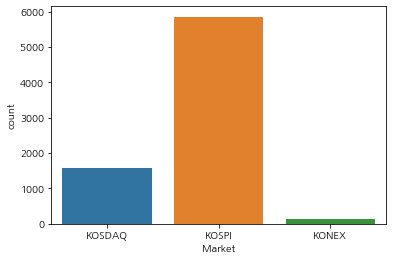

In [69]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df, x="Market")

### Sector

In [70]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
sector_count_top = df["Sector"].value_counts().head(30)
# sector_count_top.reset_index(name="count")

<AxesSubplot:>

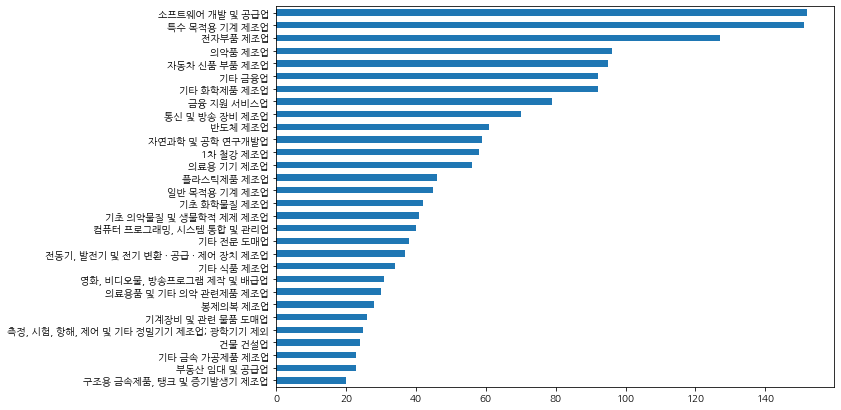

In [71]:
# sector_count_top
sector_count_top.sort_values().plot.barh(figsize=(10, 7))

<AxesSubplot:>

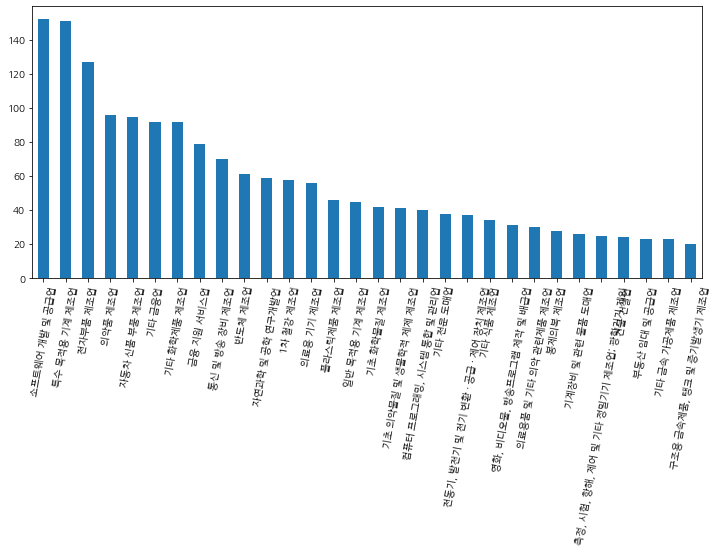

In [72]:
sector_count_top.plot.bar(rot=80, figsize=(12, 5))

In [73]:
sector_count_top.index

Index(['소프트웨어 개발 및 공급업', '특수 목적용 기계 제조업', '전자부품 제조업', '의약품 제조업',
       '자동차 신품 부품 제조업', '기타 금융업', '기타 화학제품 제조업', '금융 지원 서비스업',
       '통신 및 방송 장비 제조업', '반도체 제조업', '자연과학 및 공학 연구개발업', '1차 철강 제조업',
       '의료용 기기 제조업', '플라스틱제품 제조업', '일반 목적용 기계 제조업', '기초 화학물질 제조업',
       '기초 의약물질 및 생물학적 제제 제조업', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '기타 전문 도매업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '기타 식품 제조업',
       '영화, 비디오물, 방송프로그램 제작 및 배급업', '의료용품 및 기타 의약 관련제품 제조업', '봉제의복 제조업',
       '기계장비 및 관련 물품 도매업', '측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외', '건물 건설업',
       '부동산 임대 및 공급업', '기타 금속 가공제품 제조업', '구조용 금속제품, 탱크 및 증기발생기 제조업'],
      dtype='object')

In [74]:
# df[df["Sector"].isin(sector_count_top.index)]

<AxesSubplot:xlabel='count', ylabel='Sector'>

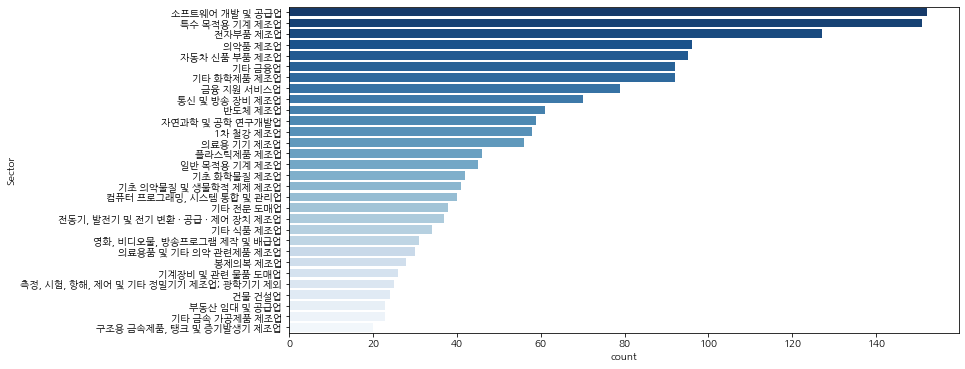

In [75]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)], 
              y="Sector", 
              order=sector_count_top.index, palette="Blues_r")

In [76]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [77]:
# 색인  == Indexing == [인덱스번호] 파이썬은 인덱스 번호가 0번 부터 시작합니다.
sector_count_top.index[0]

'소프트웨어 개발 및 공급업'

In [78]:
# 빈도수가 가장 많은 데이터 색인하기
df[df["Sector"] == sector_count_top.index[0]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
118,214270,KOSDAQ,FSN,소프트웨어 개발 및 공급업,카울리,2015-03-25,12월,"이상석, 서정교 (각자 대표이사)",http://fsn.co.kr,서울특별시,2015.0
1363,046440,KOSDAQ,KG모빌리언스,소프트웨어 개발 및 공급업,유무선전화결제서비스,2004-12-14,12월,고규영,http://www.mobilians.co.kr,서울특별시,2004.0
1365,035600,KOSDAQ,KG이니시스,소프트웨어 개발 및 공급업,전자지불서비스,2002-11-22,12월,유승용,http://www.inicis.com,서울특별시,2002.0
1669,181710,KOSPI,NHN,소프트웨어 개발 및 공급업,한게임,2013-08-29,12월,정우진,http://www.nhn.com,경기도,2013.0
1670,104200,KOSDAQ,NHN벅스,소프트웨어 개발 및 공급업,"디지털음원유통, 온라인음악서비스",2009-10-06,12월,왕문주,http://www.bugs.co.kr,경기도,2009.0
...,...,...,...,...,...,...,...,...,...,...,...
7420,054920,KOSDAQ,한컴위드,소프트웨어 개발 및 공급업,전자상거래 보안 솔루션,2001-11-01,12월,"김현수, 송상엽(각자대표)",http://www.hsecure.co.kr,경기도,2001.0
7447,220180,KOSDAQ,핸디소프트,소프트웨어 개발 및 공급업,"EKP, BPM, 네트워크장비",2016-11-24,12월,이준희,http://www.handysoft.co.kr,경기도,2016.0
7475,307950,KOSPI,현대오토에버,소프트웨어 개발 및 공급업,"전산실운영, 시스템구축, 전산장비 납품, SOC/건축 사업",2019-03-28,12월,서정식,http://www.hyundai-autoever.com,서울특별시,2019.0
7481,090850,KOSDAQ,현대이지웰,소프트웨어 개발 및 공급업,선택적복리후생서비스,2013-12-27,12월,장영순,http://www.hyundaiezwel.com,서울특별시,2013.0


### Industry

In [79]:
# 사본을 생성
df["Industry_text"] = df["Industry"]
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("지주"), "Industry_text"] = "지주회사"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("의약"), "Industry_text"] = "의약"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("합병"), "Industry_text"] = "합병"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("화장품|스킨"), "Industry_text"] = "화장품스킨케어"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("광고"), "Industry_text"] = "광고"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("게임"), "Industry_text"] = "게임"

In [80]:
df["Industry_text"] = df["Industry"]
for ind_name in ["지주", "의약품|바이오|의약", "합병", "화장품|스킨", "광고", "게임"]:
    df.loc[df["Industry"].notnull() & df["Industry"].str.contains(ind_name), "Industry_text"] = ind_name

In [81]:
# 중복을 제외한 유일값의 갯수
df["Industry_text"].nunique()

2107

In [82]:
# Industry 의 빈도수를 구합니다.
industry_top30 = df["Industry_text"].value_counts().head(30)
industry_top30

의약품|바이오|의약           99
화장품|스킨               62
합병                   52
지주                   50
게임                   33
광고                   30
금융 지원 서비스             6
부동산투자                 4
-                     4
금융 지원 서비스업            4
증권업                   3
금융지원 서비스              3
건강기능식품                3
셋톱박스                  3
기업인수                  3
자동차부품                 3
도급공사                  3
벤처캐피탈                 3
배합사료                  2
부동산 투자 및 관리           2
의료정보시스템               2
소주                    2
주정                    2
유가증권 매매,중개,대리,인수      2
백화점                   2
레미콘                   2
의료기기                  2
골프시뮬레이터               2
부동산투자, 취득, 매매, 임대     2
전력변환장치                2
Name: Industry_text, dtype: int64

<AxesSubplot:>

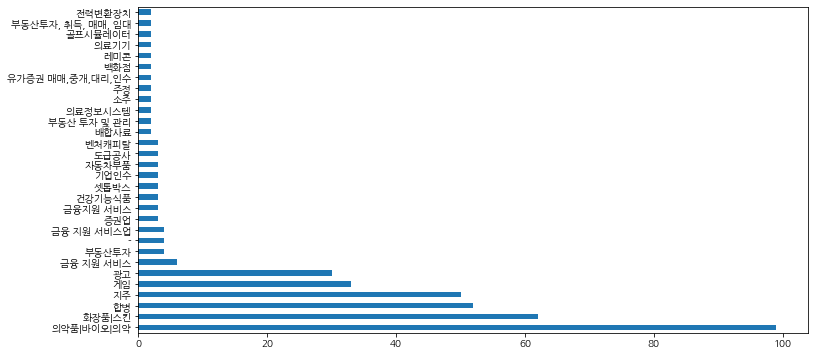

In [83]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.
industry_top30.plot.barh(figsize=(12, 6))

In [84]:
df_industry_30 = df[df["Industry_text"].isin(industry_top30.index)]

<AxesSubplot:xlabel='count', ylabel='Industry_text'>

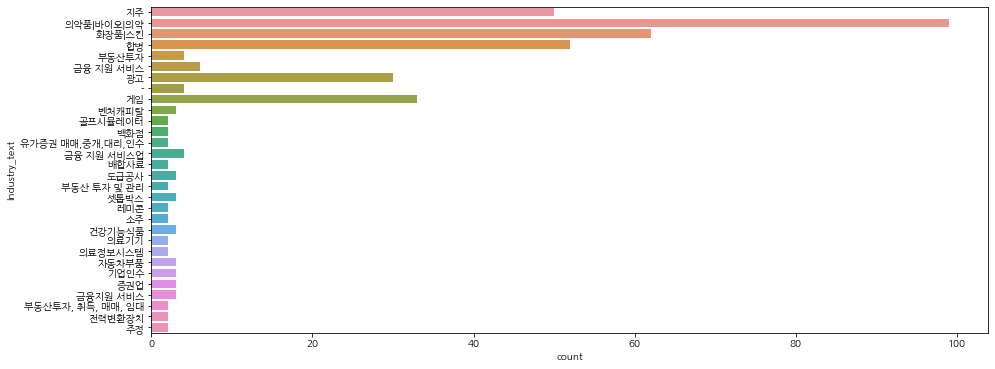

In [85]:
# seaborn
plt.figure(figsize=(15, 6))
sns.countplot(data=df_industry_30, y="Industry_text")

### Region 

In [86]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.
df["Region"].value_counts()

서울특별시      1020
경기도         710
충청남도        100
경상남도         92
인천광역시        89
충청북도         87
부산광역시        76
경상북도         65
대구광역시        53
대전광역시        52
전라북도         29
강원도          26
울산광역시        25
광주광역시        23
전라남도         22
세종특별자치시      10
홍콩            8
제주특별자치도       8
미국            6
케이맨 제도        5
일본            2
싱가포르          1
Name: Region, dtype: int64

<AxesSubplot:>

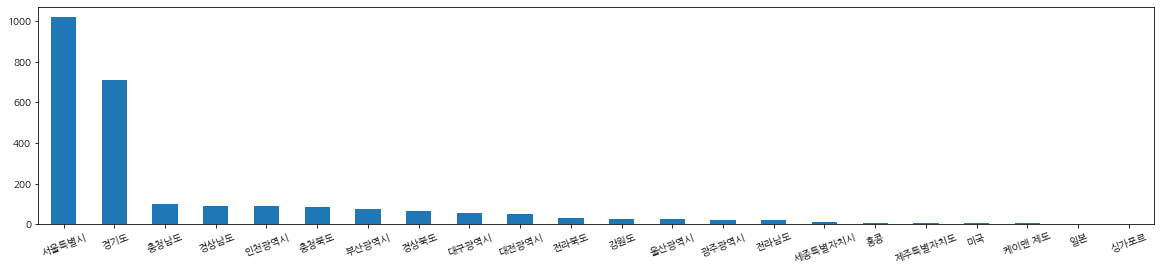

In [87]:
# df["Region"]

df["Region"].value_counts().plot.bar(figsize=(20, 4), rot=20)

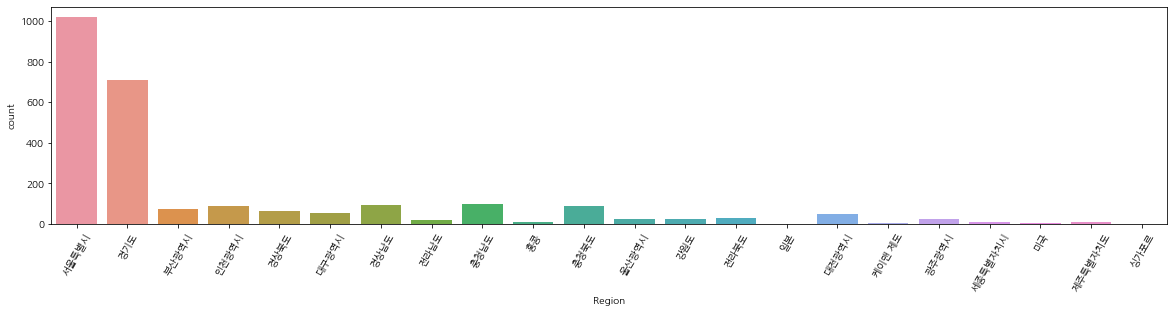

In [88]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="Region")
plt.xticks(rotation=60)
plt.show()

In [89]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.
df["Region"].value_counts().index

Index(['서울특별시', '경기도', '충청남도', '경상남도', '인천광역시', '충청북도', '부산광역시', '경상북도',
       '대구광역시', '대전광역시', '전라북도', '강원도', '울산광역시', '광주광역시', '전라남도', '세종특별자치시',
       '홍콩', '제주특별자치도', '미국', '케이맨 제도', '일본', '싱가포르'],
      dtype='object')

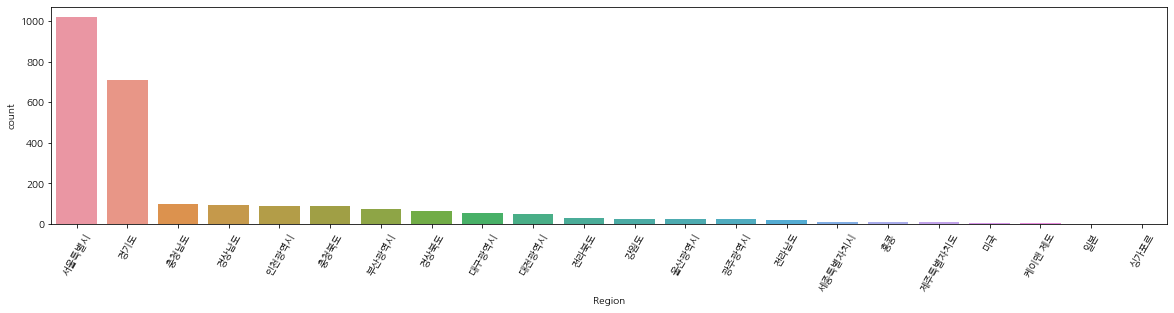

In [90]:
# Region 을 기준으로 정렬합니다.

plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="Region", order=df["Region"].value_counts().index)
plt.xticks(rotation=60)
plt.show()

In [91]:
df[df["Region"] == "싱가포르"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear,Industry_text
5910,950210,KOSPI,프레스티지바이오파마,자연과학 및 공학 연구개발업,바이오시밀러 및 항체의약품 신약,2021-02-05,06월,박소연,http://www.prestigebiopharma.com,싱가포르,2021.0,의약품|바이오|의약


## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [92]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,5,31,1,4,4,1,6,0,2,46,...,0,3,0,3,1,1,5,9,0,0
KOSDAQ,17,532,48,42,10,31,39,6,39,548,...,9,62,2,12,16,2,70,62,4,8
KOSPI,4,147,43,19,9,21,7,0,35,426,...,16,24,0,7,12,5,25,16,1,0


<AxesSubplot:xlabel='Region', ylabel='count'>

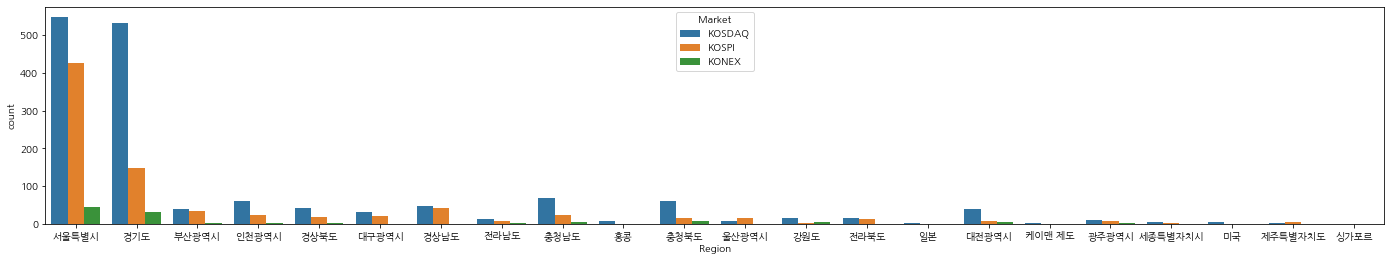

In [93]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 4))
sns.countplot(data=df, x="Region", hue="Market")

### 연도별 상장 종목 빈도수 분석

In [94]:
df.loc[df["ListingDate"].notnull(), ["Name", "ListingDate", "ListingYear"]]

,Name,ListingDate,ListingYear
0,3S,2002-04-23,2002.0
1,AJ네트웍스,2015-08-21,2015.0
2,AK홀딩스,1999-08-11,1999.0
3,APS홀딩스,2001-12-04,2001.0
4,AP시스템,2017-04-07,2017.0
...,...,...,...
7549,흥국에프엔비,2015-08-07,2015.0
7550,흥국화재,1974-12-05,1974.0
7553,흥아해운,1976-06-29,1976.0
7554,희림,2000-02-03,2000.0


In [95]:
# Market, ListingYear 빈도수 구하기
market_year = pd.crosstab(df["Market"], df["ListingYear"])
market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [96]:
# 컬럼명을 정수 형태로 변경
market_year.columns = market_year.columns.astype(int)
market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


### seaborn을 통한 빈도수 시각화

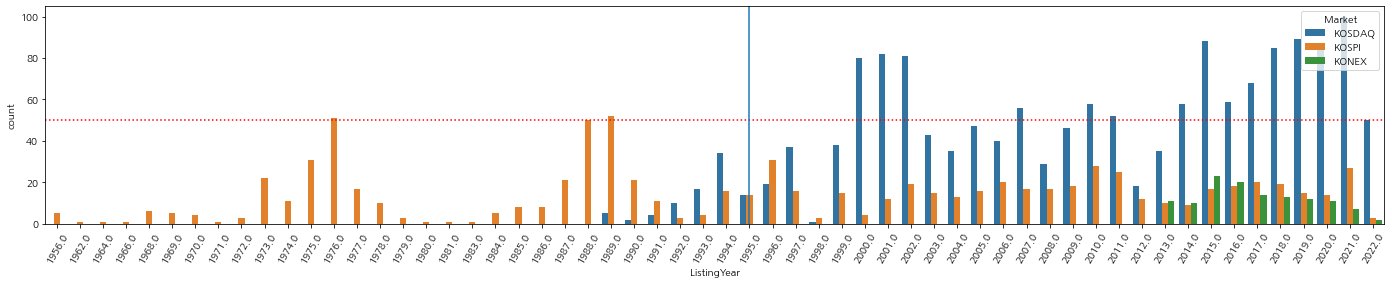

In [97]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.
# 도움말 => ()괄호 안에서 shift + tab + tab
plt.figure(figsize=(24, 4))
sns.countplot(data=df, x="ListingYear", hue="Market")
plt.axhline(50, c="r", linestyle=":")
plt.axvline(30)
plt.xticks(rotation=60)
plt.show()

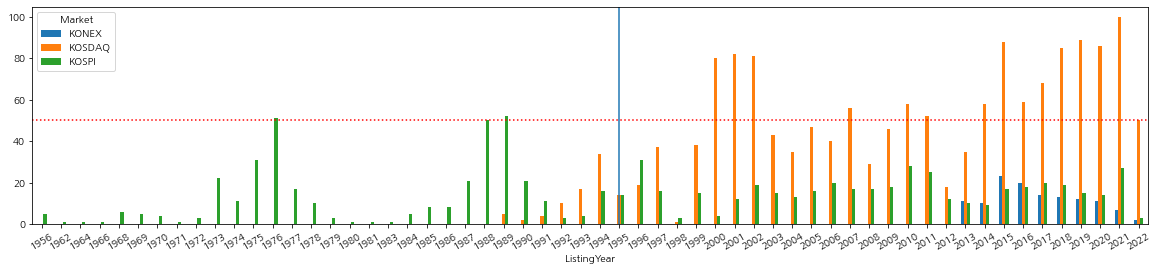

In [98]:
# T == Transpose 로 행과 열의 축을 변경합니다.
market_year.T.plot.bar(figsize=(20, 4), rot=30)
plt.axhline(50, c="r", linestyle=":")
plt.axvline(30)

### Pandas를 통한 시각화

<AxesSubplot:title={'center':'상장연도별 기업 수'}, xlabel='ListingYear'>

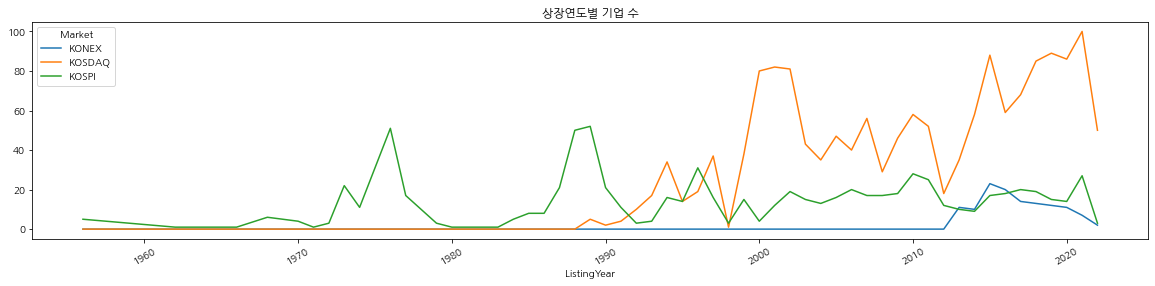

In [99]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.

market_year.T.plot(figsize=(20, 4), rot=30, title="상장연도별 기업 수")

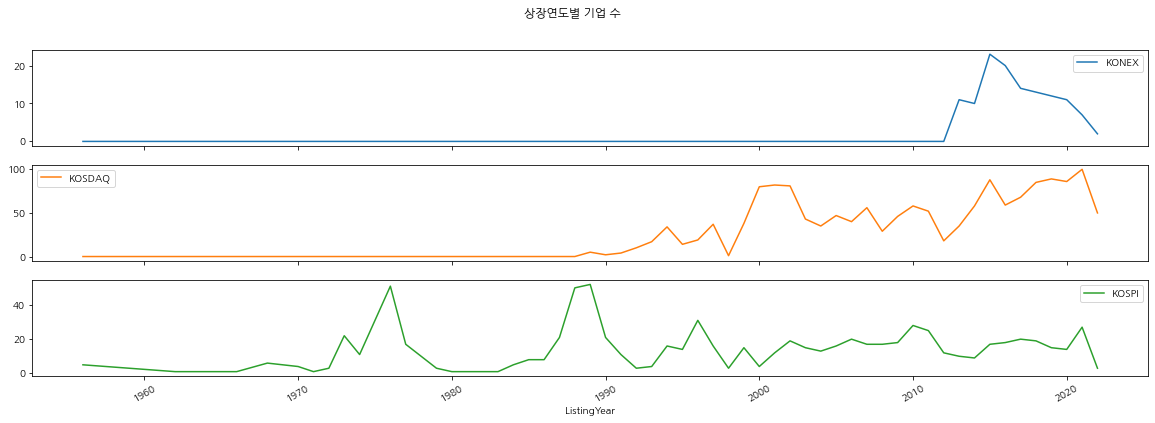

In [100]:
# 컬럼값을 subplots 으로 그립니다.

market_year.T.plot(figsize=(20, 6), rot=30, title="상장연도별 기업 수", subplots=True)
plt.show()

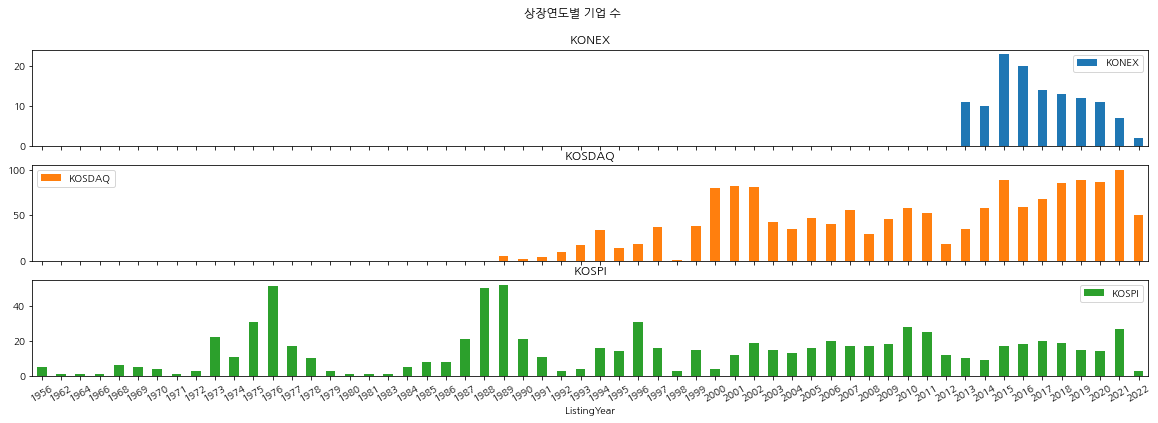

In [101]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그립니다.

market_year.T.plot.bar(figsize=(20, 6), rot=30, title="상장연도별 기업 수", subplots=True)
plt.show()

<BarContainer object of 58 artists>

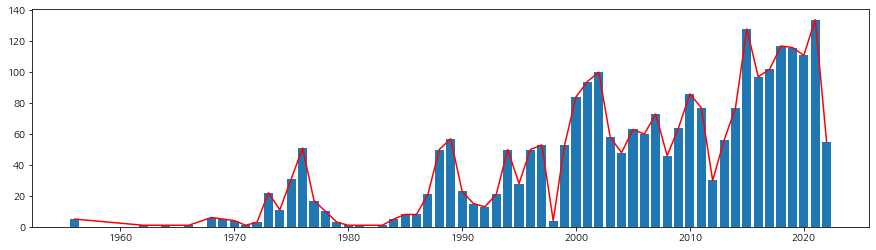

In [102]:
year_count = df["ListingYear"].value_counts().sort_index()
plt.figure(figsize=(15, 4))
plt.plot(year_count.index, year_count, c="r")
plt.bar(year_count.index, year_count)

<AxesSubplot:>

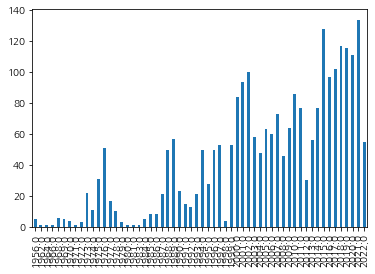

In [103]:

year_count.plot()
year_count.plot.bar()

In [104]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
# market_year.columns


In [105]:
# 막대(bar)그래프 그리기
# market_year


### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [106]:
# pd.crosstab??

In [107]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
# unstack() => [인덱스 컬럼 리스트] 에서 마지막 인덱스를 컬럼으로 보냅니다.
# market_year

# market_year = pd.crosstab(df["Market"], df["ListingYear"])
df.groupby(["Market", "ListingYear"])["Symbol"].count().unstack().fillna(0).astype(int)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [108]:
# pivot_table로 같은 결과가 나오게 연산하기
pd.pivot_table(data=df, index="Market", 
               columns="ListingYear", values="Symbol", 
               aggfunc="count").fillna(0).astype(int)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [109]:
df_market_year = df.groupby(["Market", "ListingYear"])["Symbol"].count().reset_index(name="count")
df_market_year["ListingYear"] = df_market_year["ListingYear"].astype(int)
df_market_year.head(2)

,Market,ListingYear,count
0,KONEX,2013,11
1,KONEX,2014,10


In [110]:
# plt.style.use("ggplot")

In [111]:
# 선택할 수 있는 그래프 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='ListingYear', ylabel='count'>

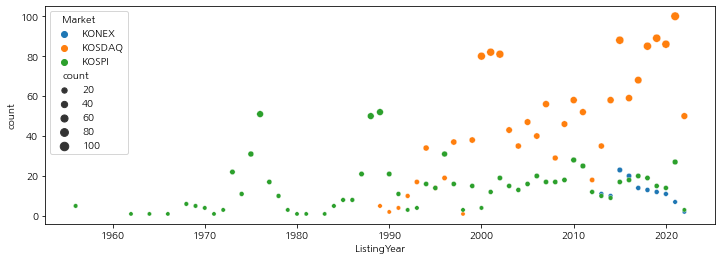

In [112]:
# 위의 groupby 결과를 scatterplot으로 그립니다.
# df_market_year
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df_market_year, x="ListingYear", y="count", hue="Market", size="count")

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

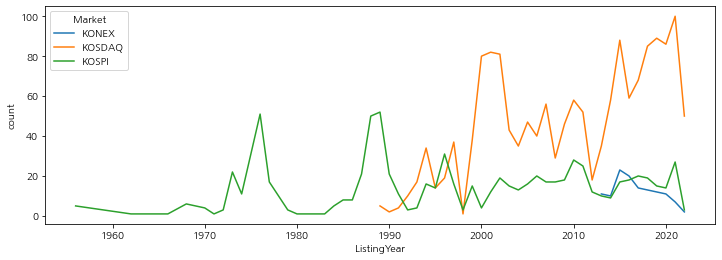

In [113]:
# lineplot 그리기

plt.figure(figsize=(12, 4))
sns.lineplot(data=df_market_year, x="ListingYear", y="count", hue="Market")

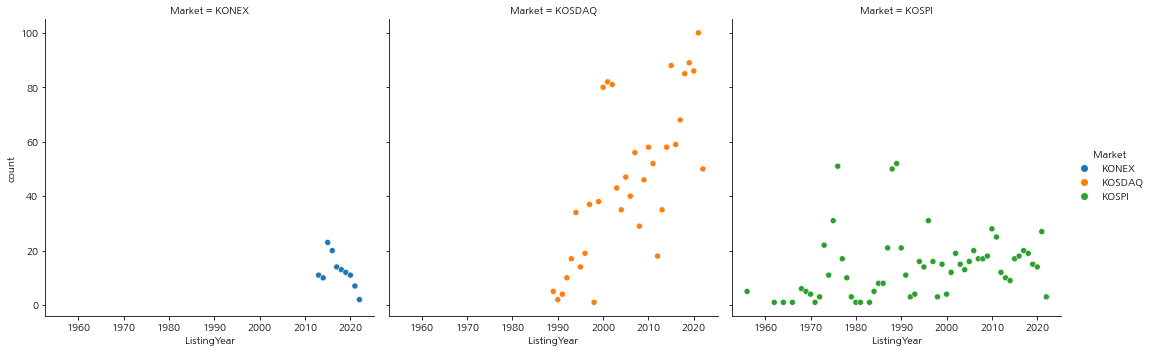

In [114]:
# relplot으로 subplot 그리기 - scatter

sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market", col="Market")

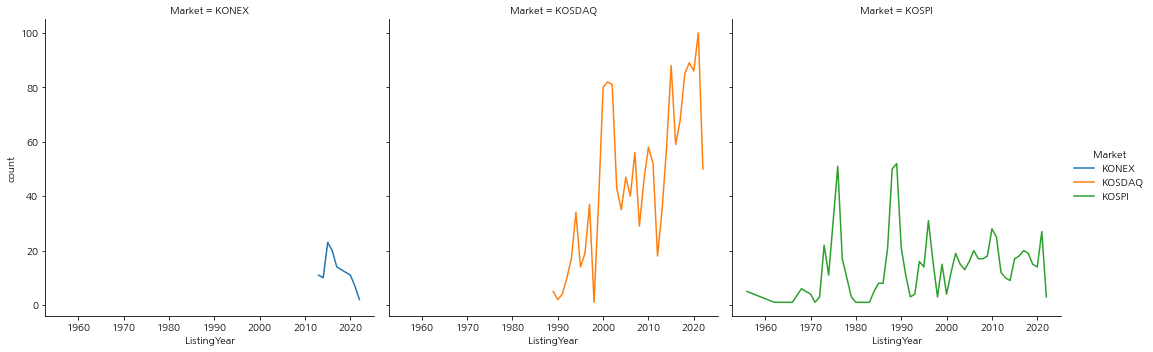

In [115]:
# relplot으로 subplot 그리기 - line

sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market", col="Market", kind="line")

### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

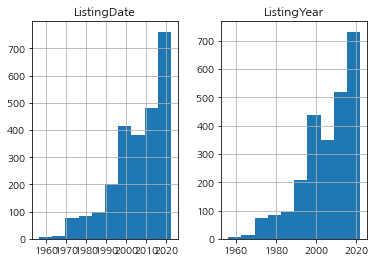

In [116]:
df.hist()
plt.show()

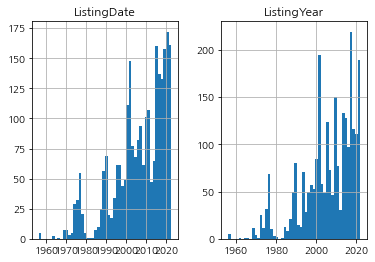

In [117]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라집니다.
df.hist(bins=50)
plt.show()

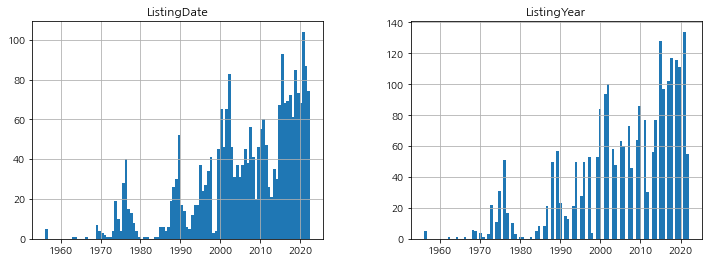

In [118]:
df.hist(bins=100, figsize=(12, 4))
plt.show()

## 데이터 색인

In [119]:
# 에 있는 회사 찾기
df[df["Region"] == "케이맨 제도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear,Industry_text
2040,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0,트랙터용 휠 및 타이어
2077,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)"
4830,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0,건강보조식품
5092,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0,지주
5739,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0,"합성운모 플레이크, 파우더, 테이프"


In [120]:
# 1970년 이전에 상장한 기업을 찾습니다.

df[df["ListingYear"] < 1970]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear,Industry_text
71,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,"강신호,민영학(각자대표)",http://www.cjlogistics.com,서울특별시,1956.0,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM..."
93,001530,KOSPI,DI동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,"서태원, 손재선",http://www.dong-il.com,서울특별시,1964.0,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출"
1679,004250,KOSPI,NPC,플라스틱제품 제조업,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매",1969-09-08,12월,최병민,http://www.npc.co.kr,경기도,1969.0,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매"
2022,000050,KOSPI,경방,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시,1956.0,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입"
2305,001440,KOSPI,대한전선,절연선 및 케이블 제조업,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사",1968-12-27,12월,나형균,http://www.taihan.com,경기도,1968.0,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사"
2307,001790,KOSPI,대한제당,"곡물가공품, 전분 및 전분제품 제조업","제당,가축용 배합사료,설탕,기능성감미료(자일로올리고당),외식산 제조,도소매/부동산 임대",1968-12-27,12월,강승우,http://www.ts.co.kr,인천광역시,1968.0,"제당,가축용 배합사료,설탕,기능성감미료(자일로올리고당),외식산 제조,도소매/부동산 임대"
2310,003490,KOSPI,대한항공,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",1966-03-18,12월,"조원태, 우기홍",http://www.koreanair.com,서울특별시,1966.0,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매"
2604,000060,KOSPI,메리츠화재,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시,1956.0,"손해보험(화재,해상,운송보험)"
4204,000070,KOSPI,삼양홀딩스,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 이영준",http://www.samyang.com,서울특별시,1968.0,지주
4301,002420,KOSPI,세기상사,연료 소매업,"극장(영화상영)/극영화,만화영화 제조/음식료품,일용잡화 소매/부동산 임대",1968-12-27,12월,조영준,http://daehancinema.com,서울특별시,1968.0,"극장(영화상영)/극영화,만화영화 제조/음식료품,일용잡화 소매/부동산 임대"


In [121]:
# and => &
# or  => |
True and True

True

In [122]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.

df[(df["ListingYear"] == 2020) & (df["Market"] == "KOSPI")]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear,Industry_text
110,365550,KOSPI,ESR켄달스퀘어리츠,부동산 임대 및 공급업,부동산투자,2020-12-23,05월,박래익,http://www.esrks-reit.com,서울특별시,2020.0,부동산투자
1354,344820,KOSPI,KCC글라스,유리 및 유리제품 제조업,판유리 등,2020-01-21,12월,김내환,http://www.kccglass.co.kr,서울특별시,2020.0,판유리 등
1744,326030,KOSPI,SK바이오팜,자연과학 및 공학 연구개발업,신경질환 및 정신질환을 포함한 중추신경 관련 신약 개발,2020-07-02,12월,조정우,NaN,경기도,2020.0,신경질환 및 정신질환을 포함한 중추신경 관련 신약 개발
2058,339770,KOSPI,교촌에프앤비,음·식료품 및 담배 도매업,치킨 프랜차이즈,2020-11-12,12월,윤진호,http://kyochonfnb.com,경상북도,2020.0,치킨 프랜차이즈
2211,353200,KOSPI,대덕전자,전자부품 제조업,"PCB(Printed Circuit Board, 인쇄회로기판)의 제조 및 판매",2020-05-21,12월,신영환,http://www.daeduck.com,경기도,2020.0,"PCB(Printed Circuit Board, 인쇄회로기판)의 제조 및 판매"
2614,009900,KOSPI,명신산업,자동차 신품 부품 제조업,자동차차체부품,2020-12-07,12월,박봉근,http://www.myoungshinindustry.com,경상북도,2020.0,자동차차체부품
3978,357250,KOSPI,미래에셋맵스리츠,부동산 임대 및 공급업,부동산 임대업,2020-08-05,11월,정상구,http://www.maps1reit.miraeasset.com,서울특별시,2020.0,부동산 임대업
5040,244920,KOSPI,에이플러스에셋,보험 및 연금관련 서비스업,보험대리 및 중개업,2020-11-20,12월,"곽근호, 서성식, 조규남",NaN,서울특별시,2020.0,보험대리 및 중개업
5386,350520,KOSPI,이지스레지던스리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-08-05,06월,박영희,http://igisresidencereit.com/,서울특별시,2020.0,"부동산투자, 취득, 매매, 임대"
5388,334890,KOSPI,이지스밸류리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-07-16,08월,도병운,http://www.igisvaluereit.com,서울특별시,2020.0,"부동산투자, 취득, 매매, 임대"


### 지역별 섹터

In [123]:
# Sector, Region 으로 crosstab 연산을 합니다.
df_sr = pd.crosstab(df["Sector"], df["Region"])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,11,12,...,0,5,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,0,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


### 컬럼과 인덱스 값으로 색인하기

In [124]:
# 특정 컬럼만 가져오기
df_sr["서울특별시"]

Sector
1차 비철금속 제조업             3
1차 철강 제조업              12
가구 제조업                  3
가전제품 및 정보통신장비 소매업       2
가정용 기기 제조업              1
                       ..
해상 운송업                  5
해체, 선별 및 원료 재생업         0
화학섬유 제조업                6
환경 정화 및 복원업             0
회사 본부 및 경영 컨설팅 서비스업     8
Name: 서울특별시, Length: 161, dtype: int64

### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [125]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기

df_sr.loc["소프트웨어 개발 및 공급업"]

Region
강원도          0
경기도         39
경상남도         1
경상북도         0
광주광역시        0
대구광역시        0
대전광역시        1
미국           0
부산광역시        1
서울특별시      106
세종특별자치시      0
싱가포르         0
울산광역시        0
인천광역시        0
일본           1
전라남도         0
전라북도         0
제주특별자치도      0
충청남도         0
충청북도         2
케이맨 제도       0
홍콩           1
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [126]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기

df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"]]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,39,1,0,0,0,1,0,1,106,...,0,0,1,0,0,0,0,2,0,1
금융 지원 서비스업,0,2,0,0,0,0,0,0,0,76,...,0,0,0,0,0,0,0,0,0,0
의약품 제조업,5,36,1,0,0,0,2,0,1,38,...,0,2,0,0,0,0,2,7,0,0


In [127]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기


df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], "서울특별시"]

Sector
소프트웨어 개발 및 공급업    106
금융 지원 서비스업         76
의약품 제조업            38
Name: 서울특별시, dtype: int64

In [128]:
# loc로 여러 행과 열 가져오기

df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], ["서울특별시", "경기도"]]

Region,서울특별시,경기도
Sector,,
소프트웨어 개발 및 공급업,106,39
금융 지원 서비스업,76,2
의약품 제조업,38,36


In [129]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.
df_sr.loc["소프트웨어 개발 및 공급업"]

Region
강원도          0
경기도         39
경상남도         1
경상북도         0
광주광역시        0
대구광역시        0
대전광역시        1
미국           0
부산광역시        1
서울특별시      106
세종특별자치시      0
싱가포르         0
울산광역시        0
인천광역시        0
일본           1
전라남도         0
전라북도         0
제주특별자치도      0
충청남도         0
충청북도         2
케이맨 제도       0
홍콩           1
Name: 소프트웨어 개발 및 공급업, dtype: int64

<AxesSubplot:ylabel='Region'>

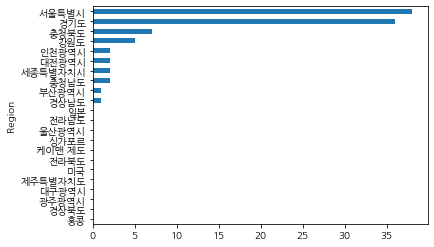

In [130]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.


df_sr.loc["의약품 제조업"].sort_values().plot.barh()

In [131]:
# iloc[행]
# iloc[행,열]
df.iloc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate        2002-04-23 00:00:00
SettleMonth                        03월
Representative                     김세완
HomePage          http://www.3sref.com
Region                           서울특별시
ListingYear                     2002.0
Industry_text              반도체 웨이퍼 캐리어
Name: 0, dtype: object

In [132]:
df.iloc[0, 0]

'060310'

In [133]:
df.iloc[[0, 1], [0, 1, 2]]

,Symbol,Market,Name
0,060310,KOSDAQ,3S
1,095570,KOSPI,AJ네트웍스


In [134]:
# df.head 혹은 tail도 내부에서 iloc를 슬라이싱으로 사용하고 있습니다.
# df_sr.head??

In [135]:
df_sr.head()

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,11,12,...,0,5,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# df_sr.tail??

In [137]:
df_sr.tail()

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,0,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0
환경 정화 및 복원업,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
회사 본부 및 경영 컨설팅 서비스업,0,2,0,0,0,1,0,0,2,8,...,0,0,0,0,0,0,0,0,0,0
